In [110]:
import pandas as pd

# Load the CSV file (make sure the path is correct if your file is elsewhere)
# df = pd.read_csv("data/bquxjob_6d1f9d31_19685a5680f.csv")
df = pd.read_csv("data/bq-results-20250430-073657-1745998667647.csv")
# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

df

,route_id,origin,destination,amount,asset,time
0,celestia/arbitrum-neutron,neutron,arbitrum,19.000000,celestia,2025-04-30 05:53:41+00:00
1,celestia/arbitrum-neutron,neutron,arbitrum,11.700000,celestia,2025-04-30 05:45:04+00:00
2,ethereum/arbitrum-base,arbitrum,base,0.007000,ethereum,2025-04-30 05:50:18+00:00
3,hyperlane/arbitrum-base,arbitrum,base,1376.137940,hyperlane,2025-04-30 05:52:09+00:00
4,hyperlane/arbitrum-bsc,arbitrum,bsc,45.156000,hyperlane,2025-04-30 05:03:15+00:00
...,...,...,...,...,...,...
6056854,ethereum/bob-zetachain,bob,zetachain,0.148500,ethereum,2024-07-30 22:48:37+00:00
6056855,ethereum/bob-zetachain,bob,zetachain,0.498895,ethereum,2024-07-30 08:56:49+00:00
6056856,ethereum/bob-zetachain,bob,zetachain,0.050000,ethereum,2024-07-29 10:11:53+00:00
6056857,ethereum/bob-zetachain,bob,zetachain,0.089315,ethereum,2024-07-25 12:12:27+00:00


In [111]:
# Top 10 source chains by message count
top_sources = (
    df['origin']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'chain', 'source': 'message_count'})
)

# Top 10 destination chains by message count
top_destinations = (
    df['destination']
    .value_counts()
    .head(20)
    .reset_index()
    .rename(columns={'index': 'chain', 'destination': 'message_count'})
)

# Top 10 destination chains by message count
top_assets = (
    df['asset']
    .value_counts()
    .head(20)
    .reset_index()
    .rename(columns={'index': 'chain', 'destination': 'message_count'})
)
top_assets

,asset,count
0,celestia,1813870
1,ethereum,1683161
2,injective-protocol,1086463
3,renzo-restaked-eth,613265
4,solana,292330
5,usd-coin,245116
6,hyperlane,98362
7,magic,79820
8,openusdt,32889
9,tether,25230


In [112]:
# target_assets = ['ethereum', 'usd-coin', 'tether', 'solana']
# df = df[df['asset'].isin(target_assets)]

In [128]:
fat_head_assets = ['ethereum', 'usd-coin', 'tether', 'solana']

def classify_asset(asset):
    if asset in fat_head_assets:
        return 'fat_head'
    else:
        return 'long_tail'

df['asset_type'] = df['asset'].apply(classify_asset)

In [142]:
fat_head_chains = ['ethereum', 'arbitrum', 'optimism', 'polygon', 'base', 'solanamainnet', 'optimism', 'bsc']

def classify(chain):
    if chain in fat_head_chains:
        return 'fat_head'
    else:
        return 'long_tail'
    
df['source_group'] = df['origin'].apply(classify)
df['destination_group'] = df['destination'].apply(classify)

# Create directional group label
df['direction'] = df['source_group'] + ' → ' + df['destination_group']

# Group by asset and direction, then count
breakdown = (
    df.groupby(['asset','asset_type', 'direction'])
    .size()
    .reset_index(name='message_count')
    .pivot(index=['asset', 'asset_type'], columns='direction', values='message_count')
    .fillna(0)
    .astype(int)
)

# Sort by total volume
breakdown['total'] = breakdown.sum(axis=1)
breakdown = breakdown.sort_values('total', ascending=False)

In [143]:
breakdown

,direction,fat_head → fat_head,fat_head → long_tail,long_tail → fat_head,long_tail → long_tail,total
asset,asset_type,,,,,
celestia,long_tail,0,588626,475975,749269,1813870
ethereum,fat_head,760665,398284,412438,111774,1683161
injective-protocol,long_tail,0,0,0,1086463,1086463
renzo-restaked-eth,long_tail,273147,140775,150000,49343,613265
solana,fat_head,0,171176,121154,0,292330
usd-coin,fat_head,23,134121,110706,266,245116
hyperlane,long_tail,98362,0,0,0,98362
magic,long_tail,0,78752,1068,0,79820
openusdt,long_tail,6702,6032,10211,9944,32889


In [144]:
# Filter out assets with low message volume
breakdown = breakdown[breakdown['total'] > 1000]

In [167]:
percentage_breakdown = breakdown.div(breakdown['total'], axis=0) * 100

# Drop 'total' from the percentage view
percentage_breakdown = percentage_breakdown.drop(columns='total')

# Round for readability
percentage_breakdown = percentage_breakdown.round(2)
percentage_breakdown

,direction,fat_head → fat_head,fat_head → long_tail,long_tail → fat_head,long_tail → long_tail
asset,asset_type,,,,
celestia,long_tail,0.00,32.45,26.24,41.31
ethereum,fat_head,45.19,23.66,24.50,6.64
injective-protocol,long_tail,0.00,0.00,0.00,100.00
renzo-restaked-eth,long_tail,44.54,22.96,24.46,8.05
solana,fat_head,0.00,58.56,41.44,0.00
usd-coin,fat_head,0.01,54.72,45.16,0.11
hyperlane,long_tail,100.00,0.00,0.00,0.00
magic,long_tail,0.00,98.66,1.34,0.00
openusdt,long_tail,20.38,18.34,31.05,30.24


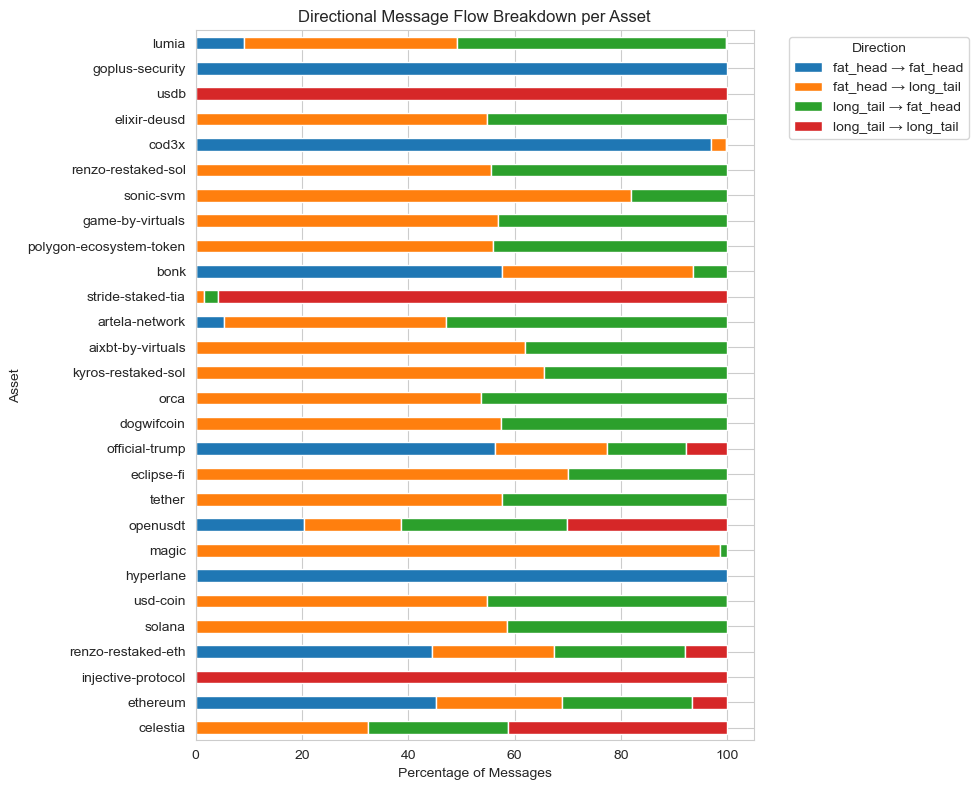

In [171]:
import matplotlib.pyplot as plt
# Reset index to flatten multi-index
plot_df = percentage_breakdown.reset_index()

# Use only the 'asset' column for labels
plot_df = plot_df.set_index('asset')

# Reorder columns for consistent stack
cols = [
    'fat_head → fat_head',
    'fat_head → long_tail',
    'long_tail → fat_head',
    'long_tail → long_tail'
]

# Plot
plot_df[cols].plot(
    kind='barh',
    stacked=True,
    figsize=(10, 8),
)

plt.xlabel("Percentage of Messages")
plt.ylabel("Asset")
plt.title("Directional Message Flow Breakdown per Asset")
plt.legend(title="Direction", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


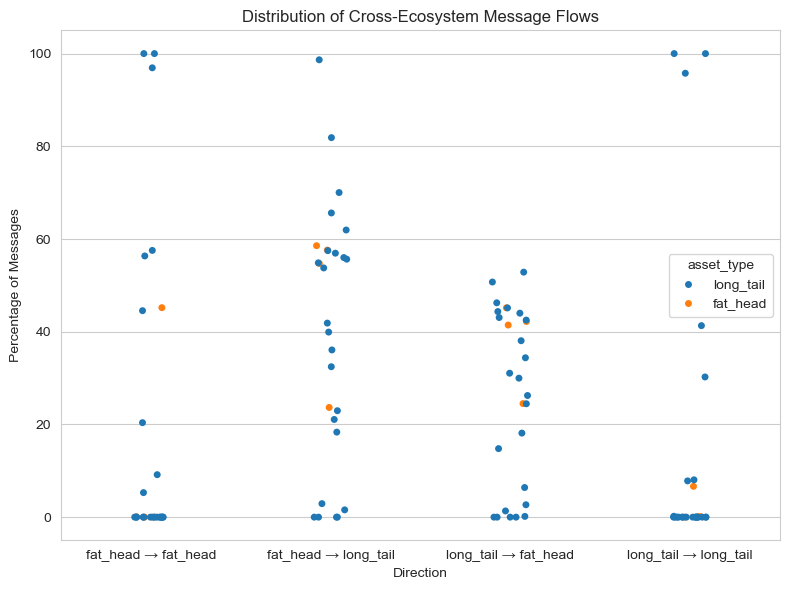

In [172]:
import seaborn as sns

# Prepare long-form data
df_dist = percentage_breakdown.reset_index()[['asset_type',
                                               'fat_head → fat_head',
    'fat_head → long_tail',
    'long_tail → fat_head',
    'long_tail → long_tail',
                                              ]
]
df_dist = df_dist.melt(id_vars='asset_type', var_name='direction', value_name='percentage')
# Plot
plt.figure(figsize=(8, 6))
sns.stripplot(data=df_dist, x='direction', y='percentage', jitter=True, hue='asset_type')
plt.title("Distribution of Cross-Ecosystem Message Flows")
plt.ylabel("Percentage of Messages")
plt.xlabel("Direction")
plt.tight_layout()
plt.show()


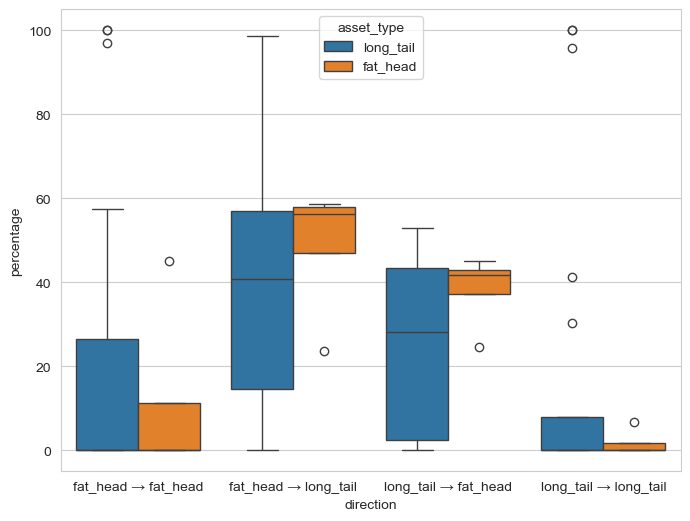

In [173]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_dist, x='direction', y='percentage', hue='asset_type')
plt.show()